=== Métriques ===
MAE  : 61.62
RMSE : 98.43
R²   : 0.993
MAPE : 1.73 %


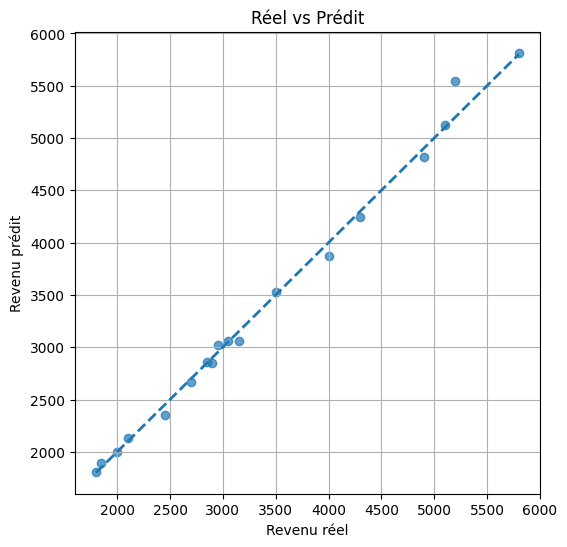

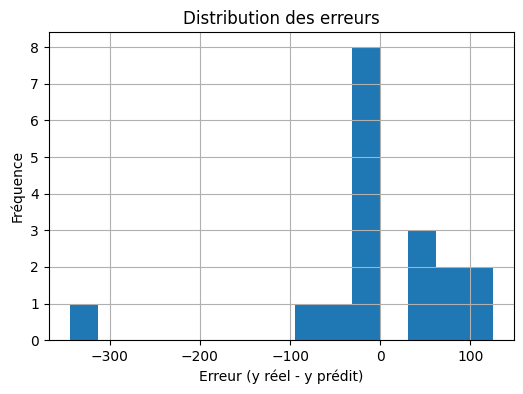

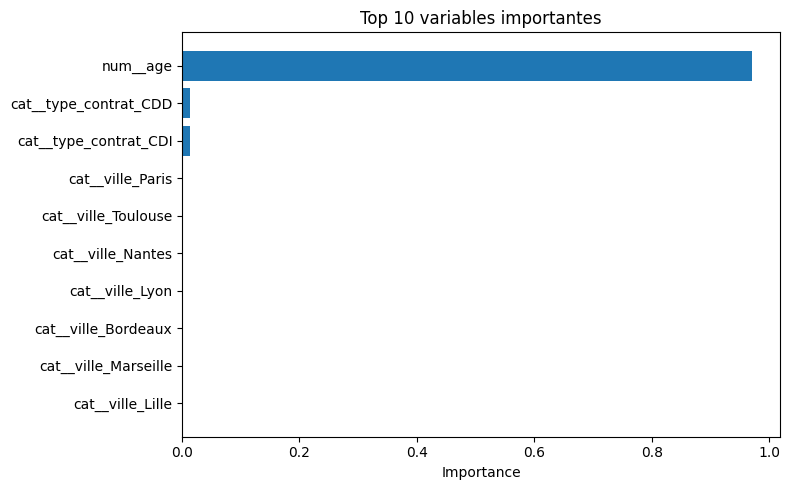

In [ ]:
#À partir de l’âge d’un client, de sa ville et de son type de contrat,
#on cherche à estimer son revenu mensuel.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = y_true != 0
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100


# =========================
# 1. Chargement des données
# =========================
df = pd.read_csv("data/clients.csv")

X = df.drop(columns=["revenu"])
y = df["revenu"]

num_features = ["age"]
cat_features = ["ville", "type_contrat"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ]
)

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
)

pipe = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", model),
    ]
)

# =========================
# 2. Train / Test
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# =========================
# 3. Métriques
# =========================
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("=== Métriques ===")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")
print(f"MAPE : {mape:.2f} %")

# =========================
# 4. VISU 1 : y réel vs y prédit
# =========================
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "--", linewidth=2)

plt.xlabel("Revenu réel")
plt.ylabel("Revenu prédit")
plt.title("Réel vs Prédit")
plt.grid(True)
plt.show()

# =========================
# 5. VISU 2 : Histogramme des erreurs
# =========================
errors = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.hist(errors, bins=15)
plt.xlabel("Erreur (y réel - y prédit)")
plt.ylabel("Fréquence")
plt.title("Distribution des erreurs")
plt.grid(True)
plt.show()

# =========================
# 6. VISU 3 : Importance des variables
# =========================
# Récupération des noms de features après OneHot
feature_names = (
    pipe.named_steps["preprocessing"]
    .get_feature_names_out()
)

importances = pipe.named_steps["model"].feature_importances_

# Top 10 features
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(8, 5))
plt.barh(feature_names[indices], importances[indices])
plt.xlabel("Importance")
plt.title("Top 10 variables importantes")
plt.tight_layout()
plt.show()


Points très proches de la diagonale

➡️ Excellent ajustement du modèle

Plus un point est proche de la ligne, plus la prédiction est juste

Ici, la majorité des points sont quasi alignés

Cela signifie que le modèle :

capture bien la relation entre age, ville, type_contrat

prédit correctement le revenu

👉 Erreur faible (MAE / RMSE bas)